<a href="https://colab.research.google.com/github/joshuads55/MIT805/blob/main/MIT805-assignment-2-code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis and visualisation of Airline Delays Dataset.

In this notebook, we intend to analyse the flight delay data. 
* Which airports have the most delays?
* Which flights have the most delays?
* Which airlines have the most delays?
* What is the leading cause of delays over time?

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! pip install geopandas
! pip install shapely
! pip install geoplot
! pip uninstall -y shapely
! pip install shapely --no-binary shapely

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 33.1 MB/s 
     |████████████████████████████████| 16.7 MB 80.6 MB/s 
     |████████████████████████████████| 6.3 MB 50.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.8 MB 63.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 64.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 46.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 30.6 MB/s 
  Installing build depend

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
from shapely.geometry import Point, LineString

In [4]:
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))

In [5]:
## Move the data to the colab directory
! cp -r /content/drive/MyDrive/MIT-Year-1/MIT805/Assignment ./data

In [ ]:
# ! rm -r data

## Airport Metrics

In this section we are going to look at the delays around airports.

In [6]:
dfAirports = pd.read_csv("./data/total-airport-count", names=["airport", 'flights'], dtype={'flights': 'int64'}, index_col='airport')
dfAirports.head()

,flights
airport,
ABE,121986
ABI,21706
ABQ,757834
ABY,7969
ACK,1825


In [7]:
dfAirportDelays = pd.read_csv("./data/delayed-airport-count", names=["airport", 'delays'], dtype={'delays': 'int64'}, index_col='airport')

In [8]:
dfAirports = dfAirports.join(dfAirportDelays)

In [9]:
dfAirports['ratio'] = dfAirports['delays'] / dfAirports['flights']

In [10]:
dfAirports.sort_values(by="ratio", inplace=True, ascending=False, axis=0)

In [11]:
dfAirports.head(n=10)

,flights,delays,ratio
airport,,,
GLH,2,2.0,1.000000
SLE,880,640.0,0.727273
ANI,472,337.0,0.713983
OTH,517,365.0,0.705996
SOP,317,212.0,0.668770
PIR,9,6.0,0.666667
TTN,1671,1042.0,0.623579
MAZ,90,56.0,0.622222
HHH,1833,1075.0,0.586470


In [12]:
geo = pd.read_csv("./data/airports.csv")
print(geo.shape)
geo.drop(columns=["id", 'ident', 'elevation_ft', 'wikipedia_link', 'home_link', 'local_code', 'scheduled_service', 'keywords', 'gps_code', 'iso_region', 'continent'], inplace=True)
geo.dropna(inplace=True, axis=0, subset=['iata_code'])
geo.set_index("iata_code", inplace=True)
geo["name"] = geo["name"].apply(lambda x: x.replace(" Airport", ""))
print(geo.shape)
geo.head(n=10)

(73805, 18)
(9160, 6)


,type,name,latitude_deg,longitude_deg,iso_country,municipality
iata_code,,,,,,
UTK,small_airport,Utirik,11.222000,169.852005,MH,Utirik Island
OCA,small_airport,Ocean Reef Club,25.325399,-80.274803,US,Key Largo
PQS,small_airport,Pilot Station,61.934601,-162.899994,US,Pilot Station
CSE,small_airport,Crested Butte Airpark,38.851918,-106.928341,US,Crested Butte
JCY,small_airport,LBJ Ranch,30.251801,-98.622498,US,Johnson City
PMX,closed,Metropolitan,42.223301,-72.311401,US,Palmer
WLR,seaplane_base,Loring Seaplane Base,55.601299,-131.636993,US,Loring
NUP,small_airport,Nunapitchuk,60.905591,-162.440454,US,Nunapitchuk
PTC,seaplane_base,Port Alice Seaplane Base,55.803000,-133.597000,US,Port Alice


In [13]:
dfAirports = dfAirports.join(geo)

In [14]:
dfAirports.sort_values(by="ratio", ascending=False, inplace=True)

In [15]:
dfAirports.head(n=10)

,flights,delays,ratio,type,name,latitude_deg,longitude_deg,iso_country,municipality
airport,,,,,,,,,
GLH,2,2.0,1.000000,medium_airport,Mid Delta Regional,33.482899,-90.985603,US,Greenville
SLE,880,640.0,0.727273,medium_airport,Salem Municipal/McNary Field,44.909500,-123.002998,US,Salem
ANI,472,337.0,0.713983,medium_airport,Aniak,61.581600,-159.542999,US,Aniak
OTH,517,365.0,0.705996,medium_airport,Southwest Oregon Regional,43.417099,-124.246002,US,North Bend
SOP,317,212.0,0.668770,small_airport,Moore County,35.237184,-79.389381,US,Carthage
PIR,9,6.0,0.666667,medium_airport,Pierre Regional,44.382702,-100.286003,US,Pierre
TTN,1671,1042.0,0.623579,medium_airport,Trenton Mercer,40.276699,-74.813499,US,Trenton
MAZ,90,56.0,0.622222,medium_airport,Eugenio Maria De Hostos,18.255699,-67.148499,PR,Mayaguez
HHH,1833,1075.0,0.586470,small_airport,Hilton Head,32.224400,-80.697502,US,Hilton Head Island


In [16]:
top20DelayedAirports = dfAirports.iloc[0:20]
top20DelayedAirports.head()

,flights,delays,ratio,type,name,latitude_deg,longitude_deg,iso_country,municipality
airport,,,,,,,,,
GLH,2,2.0,1.000000,medium_airport,Mid Delta Regional,33.482899,-90.985603,US,Greenville
SLE,880,640.0,0.727273,medium_airport,Salem Municipal/McNary Field,44.909500,-123.002998,US,Salem
ANI,472,337.0,0.713983,medium_airport,Aniak,61.581600,-159.542999,US,Aniak
OTH,517,365.0,0.705996,medium_airport,Southwest Oregon Regional,43.417099,-124.246002,US,North Bend
SOP,317,212.0,0.668770,small_airport,Moore County,35.237184,-79.389381,US,Carthage


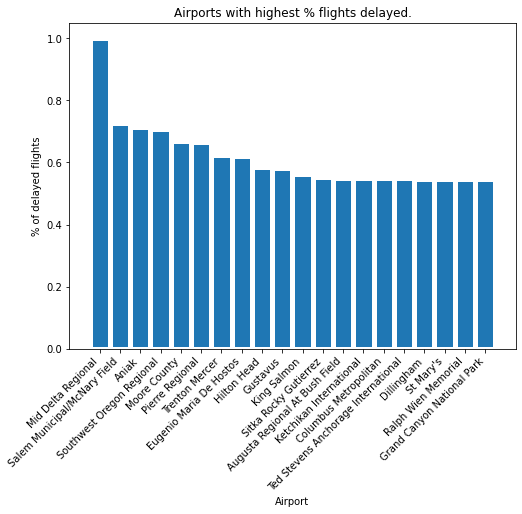

In [20]:
fig = plt.figure(figsize=(8, 6))
ax = fig.subplots()

labels = top20DelayedAirports['name'].to_numpy()
counts = top20DelayedAirports['ratio'].to_numpy()

ax.bar(labels, counts, width=1, edgecolor="white", linewidth=5)
plt.xticks(rotation=45, ha='right')

ax.set_ylabel("% of delayed flights")
ax.set_xlabel('Airport')
ax.set_title("Airports with highest % flights delayed.")

plt.show()

In [21]:
delayedAirports = dfAirports.iloc[0:100]
geometry = [Point(xy) for xy in zip(delayedAirports["longitude_deg"], delayedAirports["latitude_deg"])]
geoDelayedDf = gpd.GeoDataFrame(delayedAirports, crs=None, geometry=geometry)
geoDelayedDf.head()

,flights,delays,ratio,type,name,latitude_deg,longitude_deg,iso_country,municipality,geometry
airport,,,,,,,,,,
GLH,2,2.0,1.000000,medium_airport,Mid Delta Regional,33.482899,-90.985603,US,Greenville,POINT (-90.98560 33.48290)
SLE,880,640.0,0.727273,medium_airport,Salem Municipal/McNary Field,44.909500,-123.002998,US,Salem,POINT (-123.00300 44.90950)
ANI,472,337.0,0.713983,medium_airport,Aniak,61.581600,-159.542999,US,Aniak,POINT (-159.54300 61.58160)
OTH,517,365.0,0.705996,medium_airport,Southwest Oregon Regional,43.417099,-124.246002,US,North Bend,POINT (-124.24600 43.41710)
SOP,317,212.0,0.668770,small_airport,Moore County,35.237184,-79.389381,US,Carthage,POINT (-79.38938 35.23718)


Text(0.5, 1.0, 'Airports with highest % flights delayed')

/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


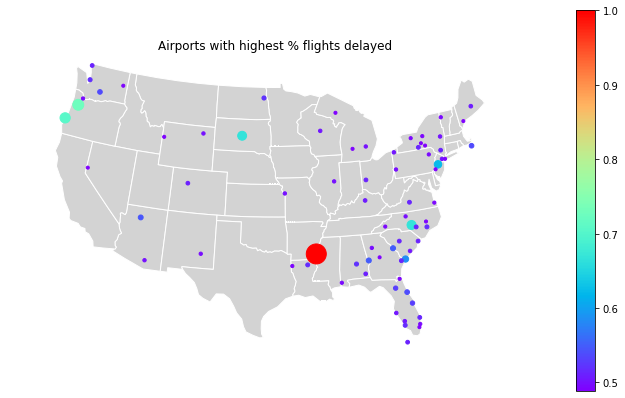

In [25]:
## Plot map of USA
ax = gplt.polyplot(
    contiguous_usa,
    zorder=-1,
    linewidth=1,
    projection=gcrs.AlbersEqualArea(),
    edgecolor='white',
    facecolor='lightgray',
    figsize=(12, 7)
)
gplt.pointplot(
    geoDelayedDf, 
    ax=ax, 
    extent=contiguous_usa.total_bounds, 
    scale="ratio", 
    limits=(3, 20), 
    hue="ratio", \
    legend=True, 
    legend_var='hue',
    cmap="rainbow"
)

plt.title("Airports with highest % flights delayed")

In [23]:
top20LargerDelayedAirports = dfAirports[dfAirports["flights"] >= 100].iloc[:20]
top20LargerDelayedAirports.head()

,flights,delays,ratio,type,name,latitude_deg,longitude_deg,iso_country,municipality
airport,,,,,,,,,
SLE,880,640.0,0.727273,medium_airport,Salem Municipal/McNary Field,44.909500,-123.002998,US,Salem
ANI,472,337.0,0.713983,medium_airport,Aniak,61.581600,-159.542999,US,Aniak
OTH,517,365.0,0.705996,medium_airport,Southwest Oregon Regional,43.417099,-124.246002,US,North Bend
SOP,317,212.0,0.668770,small_airport,Moore County,35.237184,-79.389381,US,Carthage
TTN,1671,1042.0,0.623579,medium_airport,Trenton Mercer,40.276699,-74.813499,US,Trenton


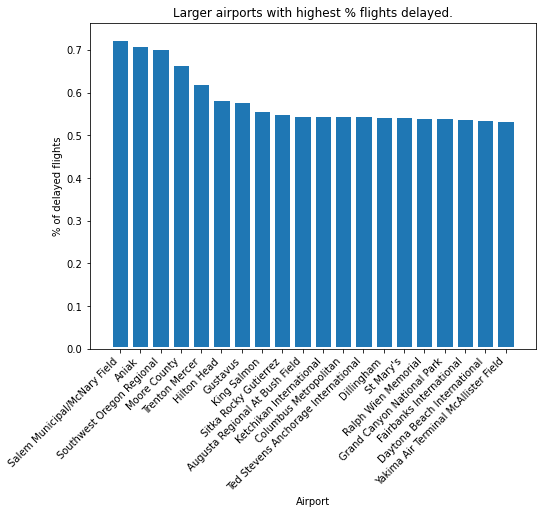

In [27]:
fig = plt.figure(figsize=(8, 6))
ax = fig.subplots()

labels = top20LargerDelayedAirports['name'].to_numpy()
counts = top20LargerDelayedAirports['ratio'].to_numpy()

ax.bar(labels, counts, width=1, edgecolor="white", linewidth=5)
plt.xticks(rotation=45, ha='right')

ax.set_ylabel("% of delayed flights")
ax.set_xlabel('Airport')
ax.set_title("Larger airports with highest % flights delayed.")

plt.show()

In [28]:
delayedAirports = dfAirports[dfAirports["flights"] >= 100].iloc[0:100]
geometry = [Point(xy) for xy in zip(delayedAirports["longitude_deg"], delayedAirports["latitude_deg"])]
geoDelayedLargeDf = gpd.GeoDataFrame(delayedAirports, crs=None, geometry=geometry)
geoDelayedLargeDf.head()

,flights,delays,ratio,type,name,latitude_deg,longitude_deg,iso_country,municipality,geometry
airport,,,,,,,,,,
SLE,880,640.0,0.727273,medium_airport,Salem Municipal/McNary Field,44.909500,-123.002998,US,Salem,POINT (-123.00300 44.90950)
ANI,472,337.0,0.713983,medium_airport,Aniak,61.581600,-159.542999,US,Aniak,POINT (-159.54300 61.58160)
OTH,517,365.0,0.705996,medium_airport,Southwest Oregon Regional,43.417099,-124.246002,US,North Bend,POINT (-124.24600 43.41710)
SOP,317,212.0,0.668770,small_airport,Moore County,35.237184,-79.389381,US,Carthage,POINT (-79.38938 35.23718)
TTN,1671,1042.0,0.623579,medium_airport,Trenton Mercer,40.276699,-74.813499,US,Trenton,POINT (-74.81350 40.27670)


Text(0.5, 1.0, 'Larger airports with highest % flights delayed')

/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


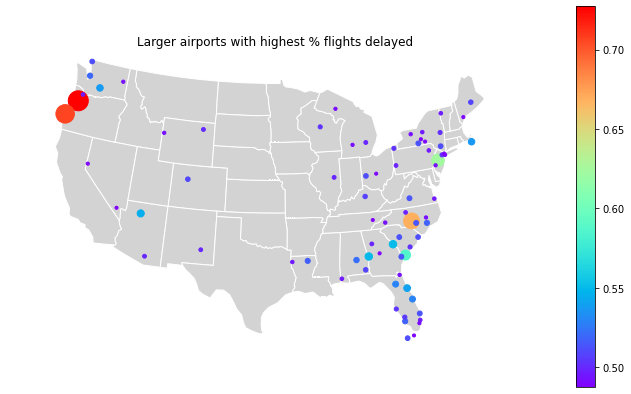

In [30]:
## Plot map of USA
ax = gplt.polyplot(
    contiguous_usa,
    zorder=-1,
    linewidth=1,
    projection=gcrs.AlbersEqualArea(),
    edgecolor='white',
    facecolor='lightgray',
    figsize=(12, 7)
)
gplt.pointplot(
    geoDelayedLargeDf, 
    ax=ax, 
    extent=contiguous_usa.total_bounds, 
    scale="ratio", 
    limits=(3, 20), 
    hue="ratio", \
    legend=True, 
    legend_var='hue',
    cmap="rainbow"
)

plt.title("Larger airports with highest % flights delayed")

## Flight Metrics

In this section we will do the same, but for flights.

In [31]:
dfFlights = pd.read_csv('./data/total-flight-count', names=['flight', "count"], dtype={"count":"int64"})
dfFlights['origin'] = dfFlights['flight'].apply(lambda x: x.split("-")[0])
dfFlights['destination'] = dfFlights['flight'].apply(lambda x: x.split("-")[1])
dfFlights.set_index("flight", inplace=True)
dfFlights.head()

,count,origin,destination
flight,,,
ABE-ALB,2,ABE,ALB
ABE-ATL,16541,ABE,ATL
ABE-AVP,1627,ABE,AVP
ABE-AZO,1,ABE,AZO
ABE-BDL,1,ABE,BDL


In [32]:
dfFlightDelays = pd.read_csv("./data/delayed-flight-count", names=["flight", 'delays'], dtype={"delays": 'int64'}, index_col="flight")
dfFlightDelays.head()

,delays
flight,
ABE-ALB,2
ABE-ATL,7430
ABE-AVP,567
ABE-BDL,1
ABE-BWI,1210


In [33]:
dfFlights = dfFlights.join(dfFlightDelays)

In [34]:
dfFlights.fillna(0, inplace=True)
dfFlights['ratio'] = dfFlights['delays'] / dfFlights['count']
dfFlights.head()

,count,origin,destination,delays,ratio
flight,,,,,
ABE-ALB,2,ABE,ALB,2.0,1.000000
ABE-ATL,16541,ABE,ATL,7430.0,0.449187
ABE-AVP,1627,ABE,AVP,567.0,0.348494
ABE-AZO,1,ABE,AZO,0.0,0.000000
ABE-BDL,1,ABE,BDL,1.0,1.000000


In [35]:
dfFlights = dfFlights.join(geo, on="origin")
dfFlights = dfFlights.join(geo, on="destination", rsuffix="_dest")
dfFlights.head()

,count,origin,destination,delays,ratio,type,name,latitude_deg,longitude_deg,iso_country,municipality,type_dest,name_dest,latitude_deg_dest,longitude_deg_dest,iso_country_dest,municipality_dest
flight,,,,,,,,,,,,,,,,,
ABE-ALB,2,ABE,ALB,2.0,1.000000,medium_airport,Lehigh Valley International,40.651773,-75.442797,US,Allentown,medium_airport,Albany International,42.748299,-73.801697,US,Albany
ABE-ATL,16541,ABE,ATL,7430.0,0.449187,medium_airport,Lehigh Valley International,40.651773,-75.442797,US,Allentown,large_airport,Hartsfield Jackson Atlanta International,33.636700,-84.428101,US,Atlanta
ABE-AVP,1627,ABE,AVP,567.0,0.348494,medium_airport,Lehigh Valley International,40.651773,-75.442797,US,Allentown,medium_airport,Wilkes Barre Scranton International,41.338501,-75.723396,US,Wilkes-Barre/Scranton
ABE-AZO,1,ABE,AZO,0.0,0.000000,medium_airport,Lehigh Valley International,40.651773,-75.442797,US,Allentown,medium_airport,Kalamazoo Battle Creek International,42.234901,-85.552101,US,Kalamazoo
ABE-BDL,1,ABE,BDL,1.0,1.000000,medium_airport,Lehigh Valley International,40.651773,-75.442797,US,Allentown,medium_airport,Bradley International,41.938510,-72.688066,US,Hartford


In [36]:
dfFlights.sort_values("ratio", inplace=True, ascending=False)

In [37]:
top20DelayedFlights = dfFlights.iloc[:20]
top20DelayedFlights.head()

,count,origin,destination,delays,ratio,type,name,latitude_deg,longitude_deg,iso_country,municipality,type_dest,name_dest,latitude_deg_dest,longitude_deg_dest,iso_country_dest,municipality_dest
flight,,,,,,,,,,,,,,,,,
ABE-ALB,2,ABE,ALB,2.0,1.0,medium_airport,Lehigh Valley International,40.651773,-75.442797,US,Allentown,medium_airport,Albany International,42.748299,-73.801697,US,Albany
MDT-PVD,1,MDT,PVD,1.0,1.0,medium_airport,Harrisburg International,40.193501,-76.763397,US,Harrisburg,large_airport,Theodore Francis Green State,41.725038,-71.425668,US,Providence
MDT-MHT,1,MDT,MHT,1.0,1.0,medium_airport,Harrisburg International,40.193501,-76.763397,US,Harrisburg,medium_airport,Manchester-Boston Regional,42.932598,-71.435699,US,Manchester
MDT-MCN,1,MDT,MCN,1.0,1.0,medium_airport,Harrisburg International,40.193501,-76.763397,US,Harrisburg,medium_airport,Middle Georgia Regional,32.692799,-83.649200,US,Macon
MDT-JFK,2,MDT,JFK,2.0,1.0,medium_airport,Harrisburg International,40.193501,-76.763397,US,Harrisburg,large_airport,John F Kennedy International,40.639447,-73.779317,US,New York


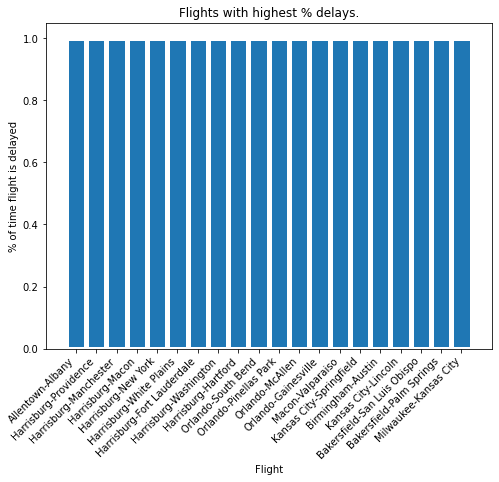

In [39]:
fig = plt.figure(figsize=(8, 6))
ax = fig.subplots()

labels = top20DelayedFlights['municipality'].to_numpy() + "-" + top20DelayedFlights['municipality_dest'].to_numpy()
counts = top20DelayedFlights['ratio'].to_numpy()

ax.bar(labels, counts, width=1, edgecolor="white", linewidth=5)
plt.xticks(rotation=45, ha='right')

ax.set_ylabel("% of time flight is delayed")
ax.set_xlabel('Flight')
ax.set_title("Flights with highest % delays.")

plt.show()

In [40]:
delayedFlights = dfFlights.iloc[0:100]
geoOrigin = [Point(xy) for xy in zip(delayedFlights["longitude_deg"], delayedFlights["latitude_deg"])]
geoDestination = [Point(xy) for xy in zip(delayedFlights["longitude_deg_dest"], delayedFlights["latitude_deg_dest"])]
geometry = [LineString(xy) for xy in zip(geoOrigin, geoDestination)]

geoDelayedFlightDf = gpd.GeoDataFrame(delayedFlights, crs="epsg:4326", geometry=geometry)
geoDelayedFlightDf.head()

,count,origin,destination,delays,ratio,type,name,latitude_deg,longitude_deg,iso_country,municipality,type_dest,name_dest,latitude_deg_dest,longitude_deg_dest,iso_country_dest,municipality_dest,geometry
flight,,,,,,,,,,,,,,,,,,
ABE-ALB,2,ABE,ALB,2.0,1.0,medium_airport,Lehigh Valley International,40.651773,-75.442797,US,Allentown,medium_airport,Albany International,42.748299,-73.801697,US,Albany,"LINESTRING (-75.44280 40.65177, -73.80170 42.7..."
MDT-PVD,1,MDT,PVD,1.0,1.0,medium_airport,Harrisburg International,40.193501,-76.763397,US,Harrisburg,large_airport,Theodore Francis Green State,41.725038,-71.425668,US,Providence,"LINESTRING (-76.76340 40.19350, -71.42567 41.7..."
MDT-MHT,1,MDT,MHT,1.0,1.0,medium_airport,Harrisburg International,40.193501,-76.763397,US,Harrisburg,medium_airport,Manchester-Boston Regional,42.932598,-71.435699,US,Manchester,"LINESTRING (-76.76340 40.19350, -71.43570 42.9..."
MDT-MCN,1,MDT,MCN,1.0,1.0,medium_airport,Harrisburg International,40.193501,-76.763397,US,Harrisburg,medium_airport,Middle Georgia Regional,32.692799,-83.649200,US,Macon,"LINESTRING (-76.76340 40.19350, -83.64920 32.6..."
MDT-JFK,2,MDT,JFK,2.0,1.0,medium_airport,Harrisburg International,40.193501,-76.763397,US,Harrisburg,large_airport,John F Kennedy International,40.639447,-73.779317,US,New York,"LINESTRING (-76.76340 40.19350, -73.77932 40.6..."


Text(0.5, 1.0, 'Top flights that are delayed the most')

/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


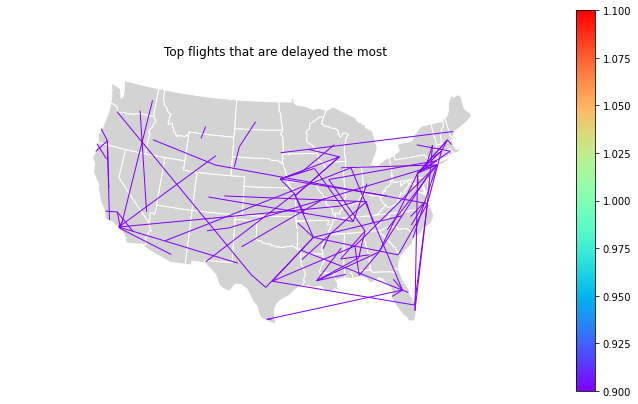

In [42]:
## Plot map
ax = gplt.polyplot(
    contiguous_usa,
    zorder=-1,
    linewidth=1,
    projection=gcrs.AlbersEqualArea(),
    edgecolor='white',
    facecolor='lightgray',
    figsize=(12, 7)
)

gplt.sankey(
    geoDelayedFlightDf, 
    projection=gcrs.Mollweide(), 
    ax=ax,
    hue="ratio", \
    legend=True, 
    legend_var='hue',
    cmap="rainbow"
)

plt.title("Top flights that are delayed the most")

In [43]:
delayedFlights = dfFlights[(dfFlights['count'] > 200) & (dfFlights["iso_country"] == 'US') & (dfFlights["iso_country_dest"] == 'US')].dropna(subset=['latitude_deg_dest', 'latitude_deg']).iloc[0:100]
geoOrigin = [Point(xy) for xy in zip(delayedFlights["longitude_deg"], delayedFlights["latitude_deg"])]
geoDestination = [Point(xy) for xy in zip(delayedFlights["longitude_deg_dest"], delayedFlights["latitude_deg_dest"])]
geometry = [LineString(xy) for xy in zip(geoOrigin, geoDestination)]

geoDelayedFlightLargeDf = gpd.GeoDataFrame(delayedFlights, crs="epsg:4326", geometry=geometry)
geoDelayedFlightLargeDf.head()

,count,origin,destination,delays,ratio,type,name,latitude_deg,longitude_deg,iso_country,municipality,type_dest,name_dest,latitude_deg_dest,longitude_deg_dest,iso_country_dest,municipality_dest,geometry
flight,,,,,,,,,,,,,,,,,,
RDU-ROA,306,RDU,ROA,277.0,0.905229,large_airport,Raleigh Durham International,35.877602,-78.787498,US,Raleigh/Durham,medium_airport,Roanoke–Blacksburg Regional,37.325500,-79.975403,US,Roanoke,"LINESTRING (-78.78750 35.87760, -79.97540 37.3..."
CMI-PIT,589,CMI,PIT,520.0,0.882852,medium_airport,University of Illinois Willard,40.039819,-88.276249,US,Savoy,large_airport,Pittsburgh International,40.491501,-80.232903,US,Pittsburgh,"LINESTRING (-88.27625 40.03982, -80.23290 40.4..."
LEX-DAY,414,LEX,DAY,359.0,0.867150,medium_airport,Blue Grass,38.036499,-84.605904,US,Lexington,medium_airport,James M Cox Dayton International,39.902401,-84.219398,US,Dayton,"LINESTRING (-84.60590 38.03650, -84.21940 39.9..."
BGM-PHL,244,BGM,PHL,211.0,0.864754,medium_airport,Greater Binghamton/Edwin A Link field,42.208698,-75.979797,US,Binghamton,large_airport,Philadelphia International,39.871899,-75.241096,US,Philadelphia,"LINESTRING (-75.97980 42.20870, -75.24110 39.8..."
MLB-MIA,248,MLB,MIA,214.0,0.862903,medium_airport,Melbourne Orlando International,28.102800,-80.645302,US,Melbourne,large_airport,Miami International,25.793200,-80.290604,US,Miami,"LINESTRING (-80.64530 28.10280, -80.29060 25.7..."


Text(0.5, 1.0, 'Top more frequent flights that are delayed the most')

/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:239: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:239: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarnin

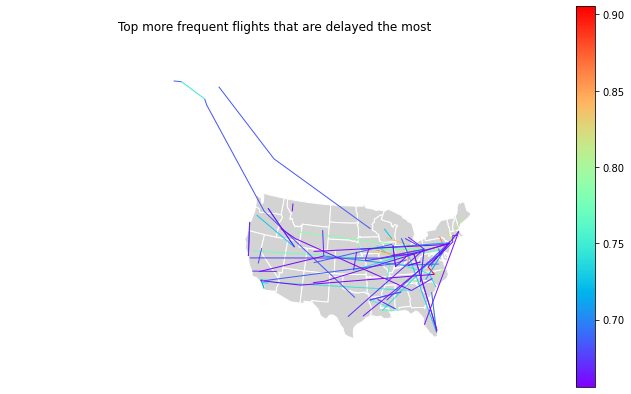

In [45]:
## Plot map
ax = gplt.polyplot(
    contiguous_usa,
    zorder=-1,
    linewidth=1,
    projection=gcrs.AlbersEqualArea(),
    edgecolor='white',
    facecolor='lightgray',
    figsize=(12, 7)
)

gplt.sankey(
    geoDelayedFlightLargeDf, 
    projection=gcrs.Mollweide(), 
    ax=ax,
    hue="ratio", \
    legend=True, 
    legend_var='hue',
    cmap="rainbow"
)

plt.title("Top more frequent flights that are delayed the most")

## Carrier Metrics

Here we will compare the number of delayed flights per carrier in the dataset.

In [46]:
dfCarrier = pd.read_csv("./data/total-carrier-count", names=["carrier-code", 'count'], index_col="carrier-code")
dfCarrier.head()

,count
carrier-code,
9E,521059
AA,14984647
AQ,154381
AS,2878021
B6,811341


In [47]:
dfCarrierDelays = pd.read_csv("./data/delayed-carrier-count", names=["carrier-code", 'delays'], index_col="carrier-code")

In [48]:
dfCarrier = dfCarrier.join(dfCarrierDelays)

In [49]:
dfCarrierNames = pd.read_csv("./data/carriers.csv", index_col="code", names=["code", "name"], header=0)

In [50]:
dfCarrier = dfCarrier.join(dfCarrierNames)

In [51]:
dfCarrier['ratio'] = dfCarrier['delays'] / dfCarrier['count']
dfCarrier.sort_values("ratio", ascending=False, inplace=True)
dfCarrier.head()

,count,delays,name,ratio
carrier-code,,,,
PI,873957,584091,Piedmont Aviation Inc.,0.668329
PS,83617,47913,Pacific Southwest Airlines,0.573005
HP,3636682,1958440,America West Airlines Inc. (Merged with US Air...,0.538524
AS,2878021,1535470,Alaska Airlines Inc.,0.533516
DL,16547870,8825137,Delta Air Lines Inc.,0.533310


In [52]:
top20DelayedCarriers = dfCarrier.iloc[:20]

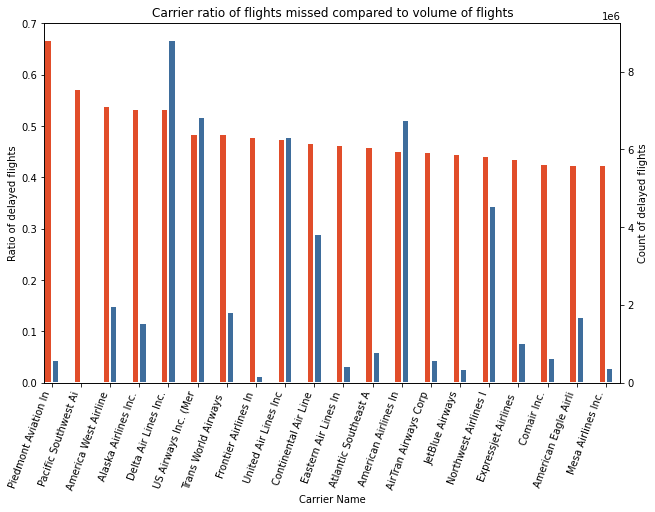

In [55]:
fig = plt.figure(figsize=(8, 5)) # Create matplotlib figure

ax1 = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax1.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.5/2

labels = top20DelayedCarriers['name'].apply(lambda x: x[:20]).to_numpy()
counts = top20DelayedCarriers['ratio'].plot(kind='bar', color='#E14D2A', ax=ax1, width=width, position=1, edgecolor="white", linewidth=2)
ratios = top20DelayedCarriers['delays'].plot(kind='bar', color='#3E6D9C', ax=ax2, width=width, position=0, edgecolor="white", linewidth=2)

x = np.arange(len(labels))  # the label locations

ax1.set_ylabel("Ratio of delayed flights")
ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation=70, ha='right')
ax1.set_xlabel("Carrier Name")

ax2.set_ylabel('Count of delayed flights')

ax1.set_title('Carrier ratio of flights missed compared to volume of flights')
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=1, hspace=1)

plt.show()

## Delay Type Metrics

In this section we will visualise the cause of various delays per year.

In [56]:
dfCauses = pd.read_csv('./data/delay-caused-per-year-count', names=["date-type", "count"])

dfCauses['year'] = dfCauses['date-type'].apply(lambda x: x.split("-")[0])
dfCauses['type'] = dfCauses['date-type'].apply(lambda x: x.split("-")[1])

dfCauses.drop("date-type", inplace=True, axis=1)
dfCauses = dfCauses.pivot(index="year", columns="type", values="count")

dfCauses.head()

type,carrier,lateAircraft,nas,security,weather
year,,,,,
2003,247037,250048,430953,3740,44620
2004,571166,593926,898557,8158,115989
2005,658635,630944,897203,6627,111388
2006,718349,731324,941866,10673,113743
2007,814922,838599,1044257,9269,127849


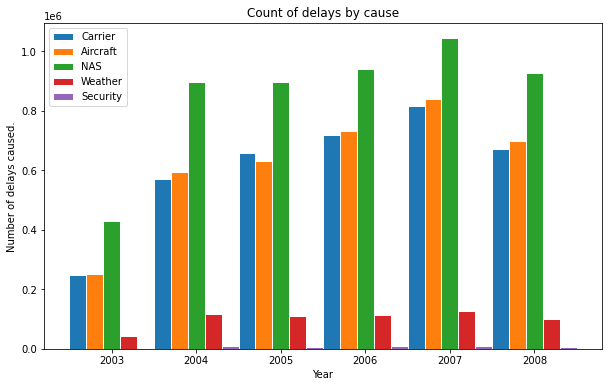

In [57]:
fig = plt.figure(figsize=(10, 6))
ax = fig.subplots()

labels = dfCauses.index.to_numpy()
carrier = dfCauses['carrier'].to_numpy()
lateAircraft = dfCauses['lateAircraft'].to_numpy()
nas = dfCauses['nas'].to_numpy()
security = dfCauses['security'].to_numpy()
weather = dfCauses['weather'].to_numpy()

width = 0.2
x = np.arange(len(labels))

ax.bar(x - width * 2, carrier, width=width, edgecolor="white", linewidth=1, label="Carrier")
ax.bar(x - width, lateAircraft, width=width, edgecolor="white", linewidth=1, label="Aircraft")
ax.bar(x, nas, width=width, edgecolor="white", linewidth=1, label="NAS")
ax.bar(x + width, weather, width=width, edgecolor="white", linewidth=1, label="Weather")
ax.bar(x + width * 2, security, width=width, edgecolor="white", linewidth=1, label="Security")

ax.set_ylabel('Number of delays caused.')
ax.set_title('Count of delays by cause')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel("Year")
ax.legend()

plt.show()